In [32]:
%matplotlib widget

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE as smote
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as PCA

In [33]:
data = pd.read_csv("HTRU_2.csv")

In [34]:
data.columns = ['Mean IP', 'Standard deviation IP', 'Excess kurtosis IP', 'Skewness IP',
                'Mean DS', 'Standard deviation DS', 'Excess kurtosis DS', 'Skewness DS',
                'Class']
# IP - integrated profile
# DS - DM-SNR curve

In [35]:
data.shape
# 17 soma instanci, devet kolona

(17897, 9)

In [36]:
data.info()
# od kolona imamo osam merenih podataka zapisanih u pokretnom zarezu
# prve cetiri opisuju zabelezeni signal
# druge cetiri opisuju nesto o razmeri jacine signala i suma
# i jednu kategoricku kolonu sa vrednostima 0 - nije pulsar i 1 - jeste pulsar
# TODO jos nesto o znacenju brojeva u prvih osam kolona

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mean IP                17897 non-null  float64
 1   Standard deviation IP  17897 non-null  float64
 2   Excess kurtosis IP     17897 non-null  float64
 3   Skewness IP            17897 non-null  float64
 4   Mean DS                17897 non-null  float64
 5   Standard deviation DS  17897 non-null  float64
 6   Excess kurtosis DS     17897 non-null  float64
 7   Skewness DS            17897 non-null  float64
 8   Class                  17897 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [37]:
data.describe()
# prosek klase je 0.09... => imamo mnogo vise negativnih merenja
# preciznije, oko 9% atributa pripada pozitivnoj klasi

Mean IP  Standard deviation IP  Excess kurtosis IP   Skewness IP  \
count  17897.000000           17897.000000        17897.000000  17897.000000   
mean     111.078321              46.549021            0.477897      1.770417   
std       25.652705               6.843040            1.064056      6.168058   
min        5.812500              24.772042           -1.876011     -1.791886   
25%      100.929688              42.375426            0.027108     -0.188528   
50%      115.078125              46.946435            0.223241      0.198736   
75%      127.085938              51.022887            0.473349      0.928206   
max      192.617188              98.778911            8.069522     68.101622   

            Mean DS  Standard deviation DS  Excess kurtosis DS   Skewness DS  \
count  17897.000000           17897.000000        17897.000000  17897.000000   
mean      12.614926              26.326918            8.303574    104.859419   
std       29.473637              19.471042            4.506217    106.517270   
min        0.213211               7.370432           -3.139270     -1.976976   
25%        1.923077              14.437330            5.781485     34.957119   
50%        2.801839              18.459977            8.433872     83.068996   
75%        5.464883              28.428152           10.702973    139.310905   
max      223.392141             110.642211           34.539844   1191.000837   

             Class  
count  17897.00000  
mean       0.09158  
std        0.28844  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        0.00000  
max        1.00000

In [38]:
dataPositive = data[data['Class'] == 1]
dataNegative = data[data['Class'] == 0]

<BarContainer object of 2 artists>

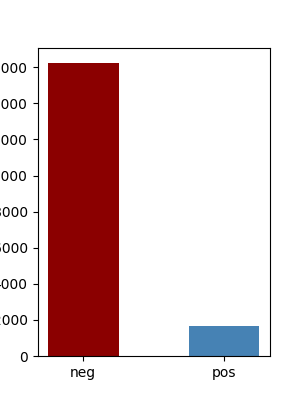

In [39]:
plt.figure(figsize = (3, 4))
plt.bar(['neg','pos'],[dataNegative.shape[0], dataPositive.shape[0]], width = 0.5, color = ['DarkRed', 'SteelBlue'])

In [40]:
#sada bih uradio npr jedan SMOTE da malo to bude balansiranije
# pre toga cu podeliti na test i trening jer smote vec menja podatke i ne zelimo menjati test skup itd itd

In [41]:
x, y = data.drop('Class', axis = 'columns'), data['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y)

In [42]:
oversample = smote()
xsmt, ysmt = oversample.fit_resample(x_train, y_train)
ysmt = np.matrix(ysmt).transpose()

datasmt = pd.DataFrame.copy(xsmt)
datasmt['Class'] = ysmt
datasmt

Mean IP  Standard deviation IP  Excess kurtosis IP  Skewness IP  \
0      112.914062              52.338297            0.147752    -0.234054   
1      124.953125              50.651052            0.234961    -0.184167   
2       49.000000              31.462776            3.500561    18.936911   
3       42.578125              35.295540            4.004085    19.064779   
4      125.609375              49.446504            0.206675    -0.087822   
...           ...                    ...                 ...          ...   
22755   57.292452              32.625352            3.140259    15.628767   
22756   19.569407              43.502570            3.741888    13.840707   
22757   49.960580              29.590948            3.048759    18.662329   
22758   74.039260              36.521003            1.557168     5.420244   
22759   36.075380              36.332234            3.932700    17.855225   

          Mean DS  Standard deviation DS  Excess kurtosis DS  Skewness DS  \
0        0.805184              10.922026           17.087612   330.902862   
1        2.883779              15.718650            8.423920    91.366470   
2        7.443980              30.929487            4.988605    26.945094   
3       19.426421              50.234055            2.932874     8.147741   
4       11.276756              40.575989            3.754500    13.522834   
...           ...                    ...                 ...          ...   
22755    6.511817              34.044063            5.626484    31.442577   
22756  134.607740              65.858047           -0.305488    -0.565657   
22757    3.257100              21.838977            7.498955    59.853351   
22758   22.117643              55.653839            2.365147     4.154373   
22759   41.549088              66.490290            1.571134     1.421470   

       Class  
0          0  
1          0  
2          1  
3          1  
4          0  
...      ...  
22755      1  
22756      1  
22757      1  
22758      1  
22759      1  

[22760 rows x 9 columns]

In [43]:
dataPositiveSmt = datasmt[datasmt['Class'] == 1]
dataNegativeSmt = datasmt[datasmt['Class'] == 0]

<BarContainer object of 2 artists>

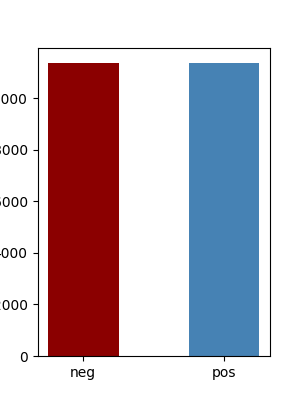

In [44]:
plt.figure(figsize = (3, 4))
plt.bar(['neg','pos'],[dataNegativeSmt.shape[0], dataPositiveSmt.shape[0]], width = 0.5, color = ['DarkRed', 'SteelBlue'])

In [45]:
data.isna().sum()
# nema nedostajucih vrednosti pa nema potrebe da uopste razmisljamo kako bismo se njima bavili
# (izbacivanjem ili dopunom nekim vrednostima)

Mean IP                  0
Standard deviation IP    0
Excess kurtosis IP       0
Skewness IP              0
Mean DS                  0
Standard deviation DS    0
Excess kurtosis DS       0
Skewness DS              0
Class                    0
dtype: int64

In [46]:
# za svaki slucaj proveravam ima li sumnjivih vrednosti koje bi ukazale na
# nekonvencionalni metod zapisivanja nedostajucih vrednosti
brojNula = {}
for key in data.keys():
    brojNula[key] = (data[key] == 0).sum()
    
brojNula

{'Mean IP': 0,
 'Standard deviation IP': 0,
 'Excess kurtosis IP': 0,
 'Skewness IP': 0,
 'Mean DS': 0,
 'Standard deviation DS': 0,
 'Excess kurtosis DS': 0,
 'Skewness DS': 0,
 'Class': 16258}

In [47]:
correlation = data.corr()
correlation

Mean IP  Standard deviation IP  Excess kurtosis IP  \
Mean IP                1.000000               0.547099           -0.873899   
Standard deviation IP  0.547099               1.000000           -0.521418   
Excess kurtosis IP    -0.873899              -0.521418            1.000000   
Skewness IP           -0.738780              -0.539792            0.945730   
Mean DS               -0.298832               0.006893            0.414362   
Standard deviation DS -0.307005              -0.047606            0.432873   
Excess kurtosis DS     0.234345               0.029436           -0.341216   
Skewness DS            0.144057               0.027714           -0.214505   
Class                 -0.673187              -0.363704            0.791592   

                       Skewness IP   Mean DS  Standard deviation DS  \
Mean IP                  -0.738780 -0.298832              -0.307005   
Standard deviation IP    -0.539792  0.006893              -0.047606   
Excess kurtosis IP        0.945730  0.414362               0.432873   
Skewness IP               1.000000  0.412052               0.415135   
Mean DS                   0.412052  1.000000               0.796554   
Standard deviation DS     0.415135  0.796554               1.000000   
Excess kurtosis DS       -0.328846 -0.615974              -0.809791   
Skewness DS              -0.204790 -0.354276              -0.575809   
Class                     0.709526  0.400873               0.491532   

                       Excess kurtosis DS  Skewness DS     Class  
Mean IP                          0.234345     0.144057 -0.673187  
Standard deviation IP            0.029436     0.027714 -0.363704  
Excess kurtosis IP              -0.341216    -0.214505  0.791592  
Skewness IP                     -0.328846    -0.204790  0.709526  
Mean DS                         -0.615974    -0.354276  0.400873  
Standard deviation DS           -0.809791    -0.575809  0.491532  
Excess kurtosis DS               1.000000     0.923744 -0.390819  
Skewness DS                      0.923744     1.000000 -0.259123  
Class                           -0.390819    -0.259123  1.000000

In [48]:
sb.heatmap(correlation, annot=True)
# ovde uvidjamo interesantne sablone korelacije i antikorelacije, vec mozemo pretpostaviti
# koje kolone ce vise uticati na klasifikaciju a koje manje
# TODO saznaj vise o prirodi podataka - sto prave ove 2x2 kvadrate

<Axes: >

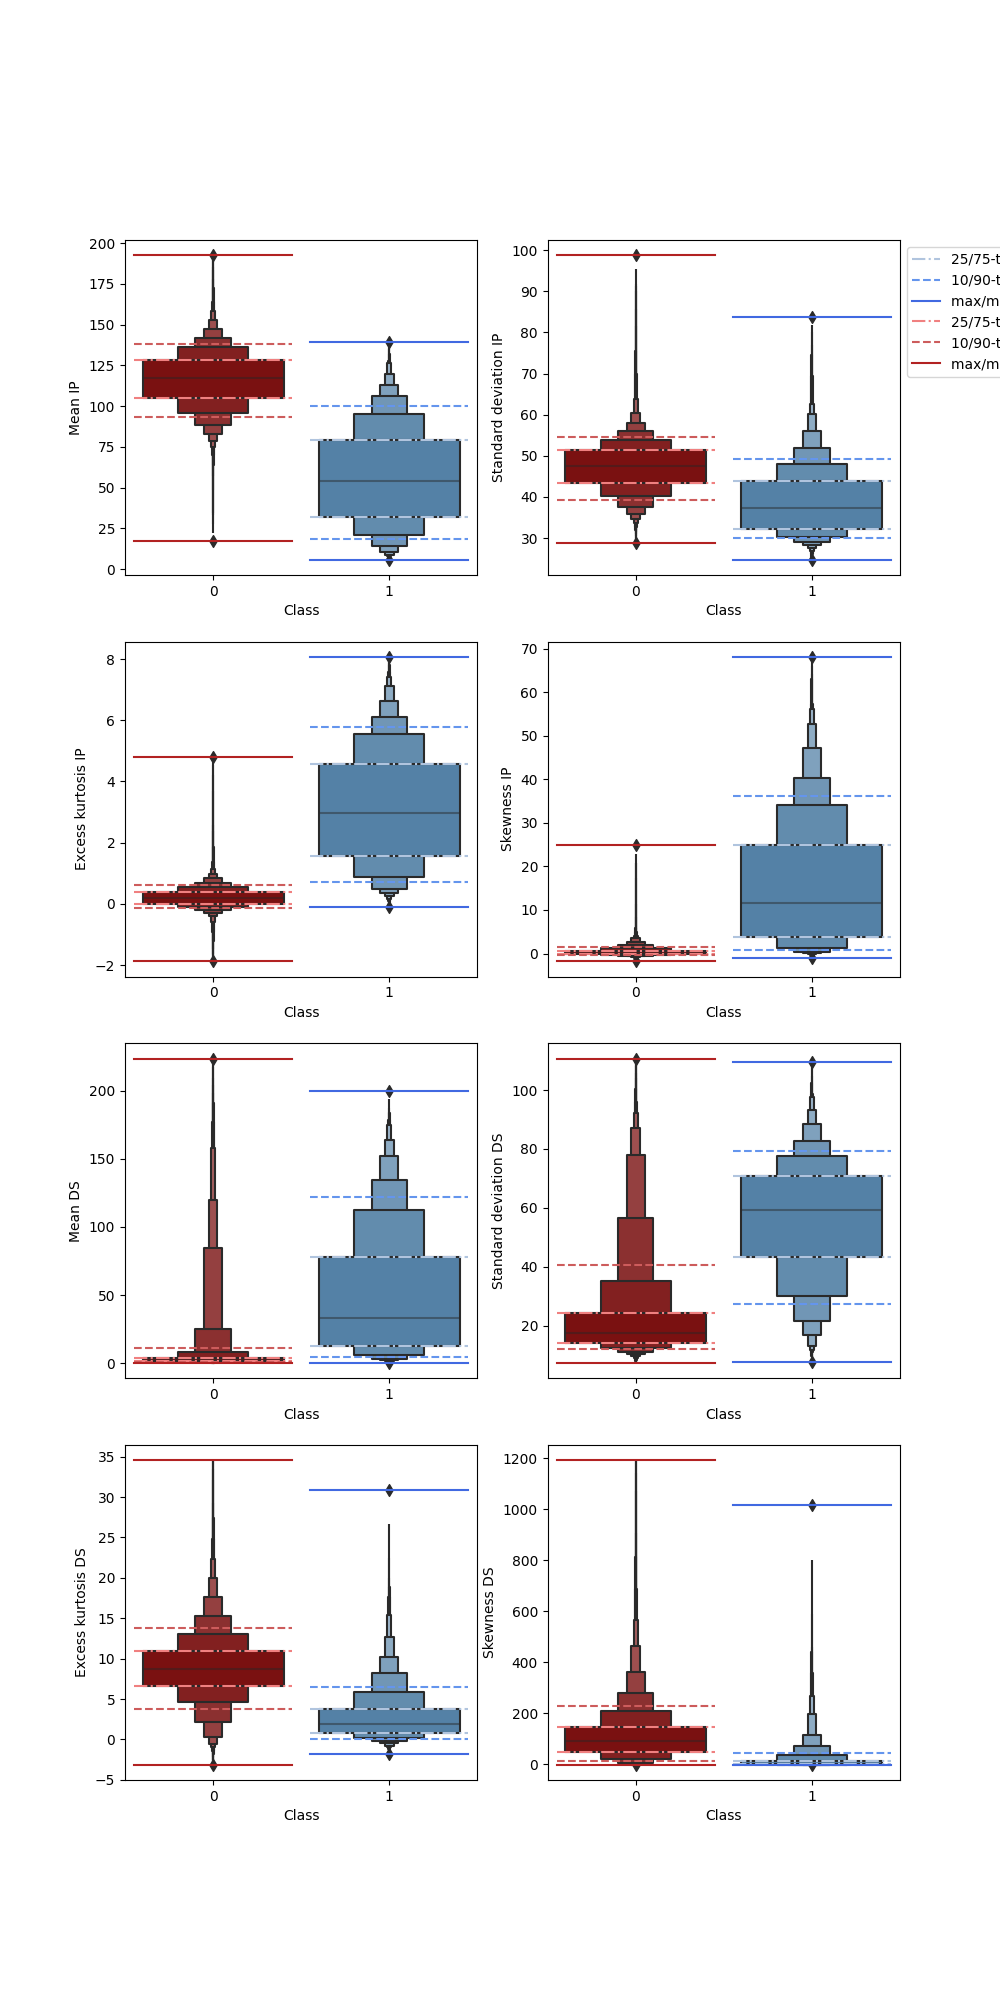

In [49]:
j = 1
plt.figure(figsize = (10, 20))
for key in data.keys():
    if key != 'Class':
        plt.subplot(4, 2, j)
        sb.boxenplot(x = data['Class'], y = data[key], palette = ['DarkRed', 'SteelBlue'], k_depth = 'full')
        plt.axhline(dataPositive[key].quantile(q = 0.75), xmin = 0.525, xmax = 0.975, color = 'LightSteelBlue', linestyle = '-.', label = '25/75-ti kvantil')
        plt.axhline(dataPositive[key].quantile(q = 0.25), xmin = 0.525, xmax = 0.975, color = 'LightSteelBlue', linestyle = '-.')
        plt.axhline(dataPositive[key].quantile(q = 0.90), xmin = 0.525, xmax = 0.975, color = 'CornFlowerBlue', linestyle = '--', label = '10/90-ti kvantil')
        plt.axhline(dataPositive[key].quantile(q = 0.10), xmin = 0.525, xmax = 0.975, color = 'CornFlowerBlue', linestyle = '--')
        plt.axhline(dataPositive[key].max(), xmin = 0.525, xmax = 0.975, color = 'RoyalBlue', label = 'max/min vrednost')
        plt.axhline(dataPositive[key].min(), xmin = 0.525, xmax = 0.975, color = 'RoyalBlue')
        plt.axhline(dataNegative[key].quantile(q = 0.75), xmin = 0.025, xmax=0.475, color = 'LightCoral', linestyle = '-.', label = '25/75-ti kvantil')
        plt.axhline(dataNegative[key].quantile(q = 0.25), xmin = 0.025, xmax=0.475, color = 'LightCoral', linestyle = '-.')
        plt.axhline(dataNegative[key].quantile(q = 0.90), xmin = 0.025, xmax=0.475, color = 'IndianRed', linestyle = '--', label = '10/90-ti kvantil')
        plt.axhline(dataNegative[key].quantile(q = 0.10), xmin = 0.025, xmax=0.475, color = 'IndianRed', linestyle = '--')
        plt.axhline(dataNegative[key].max(), xmin = 0.025, xmax=0.475, color = 'FireBrick', label = 'max/min vrednost')
        plt.axhline(dataNegative[key].min(), xmin = 0.025, xmax=0.475, color = 'FireBrick')
        if j == 2:
            plt.legend(bbox_to_anchor = (1, 1))
        j = j + 1
        
# medijanu i kvantile svih podataka zajedno ne crtamo jer znamo da kako klase 1 ima manje od 1% te granice se
# nece mnogo razlikovati od granica klase 0

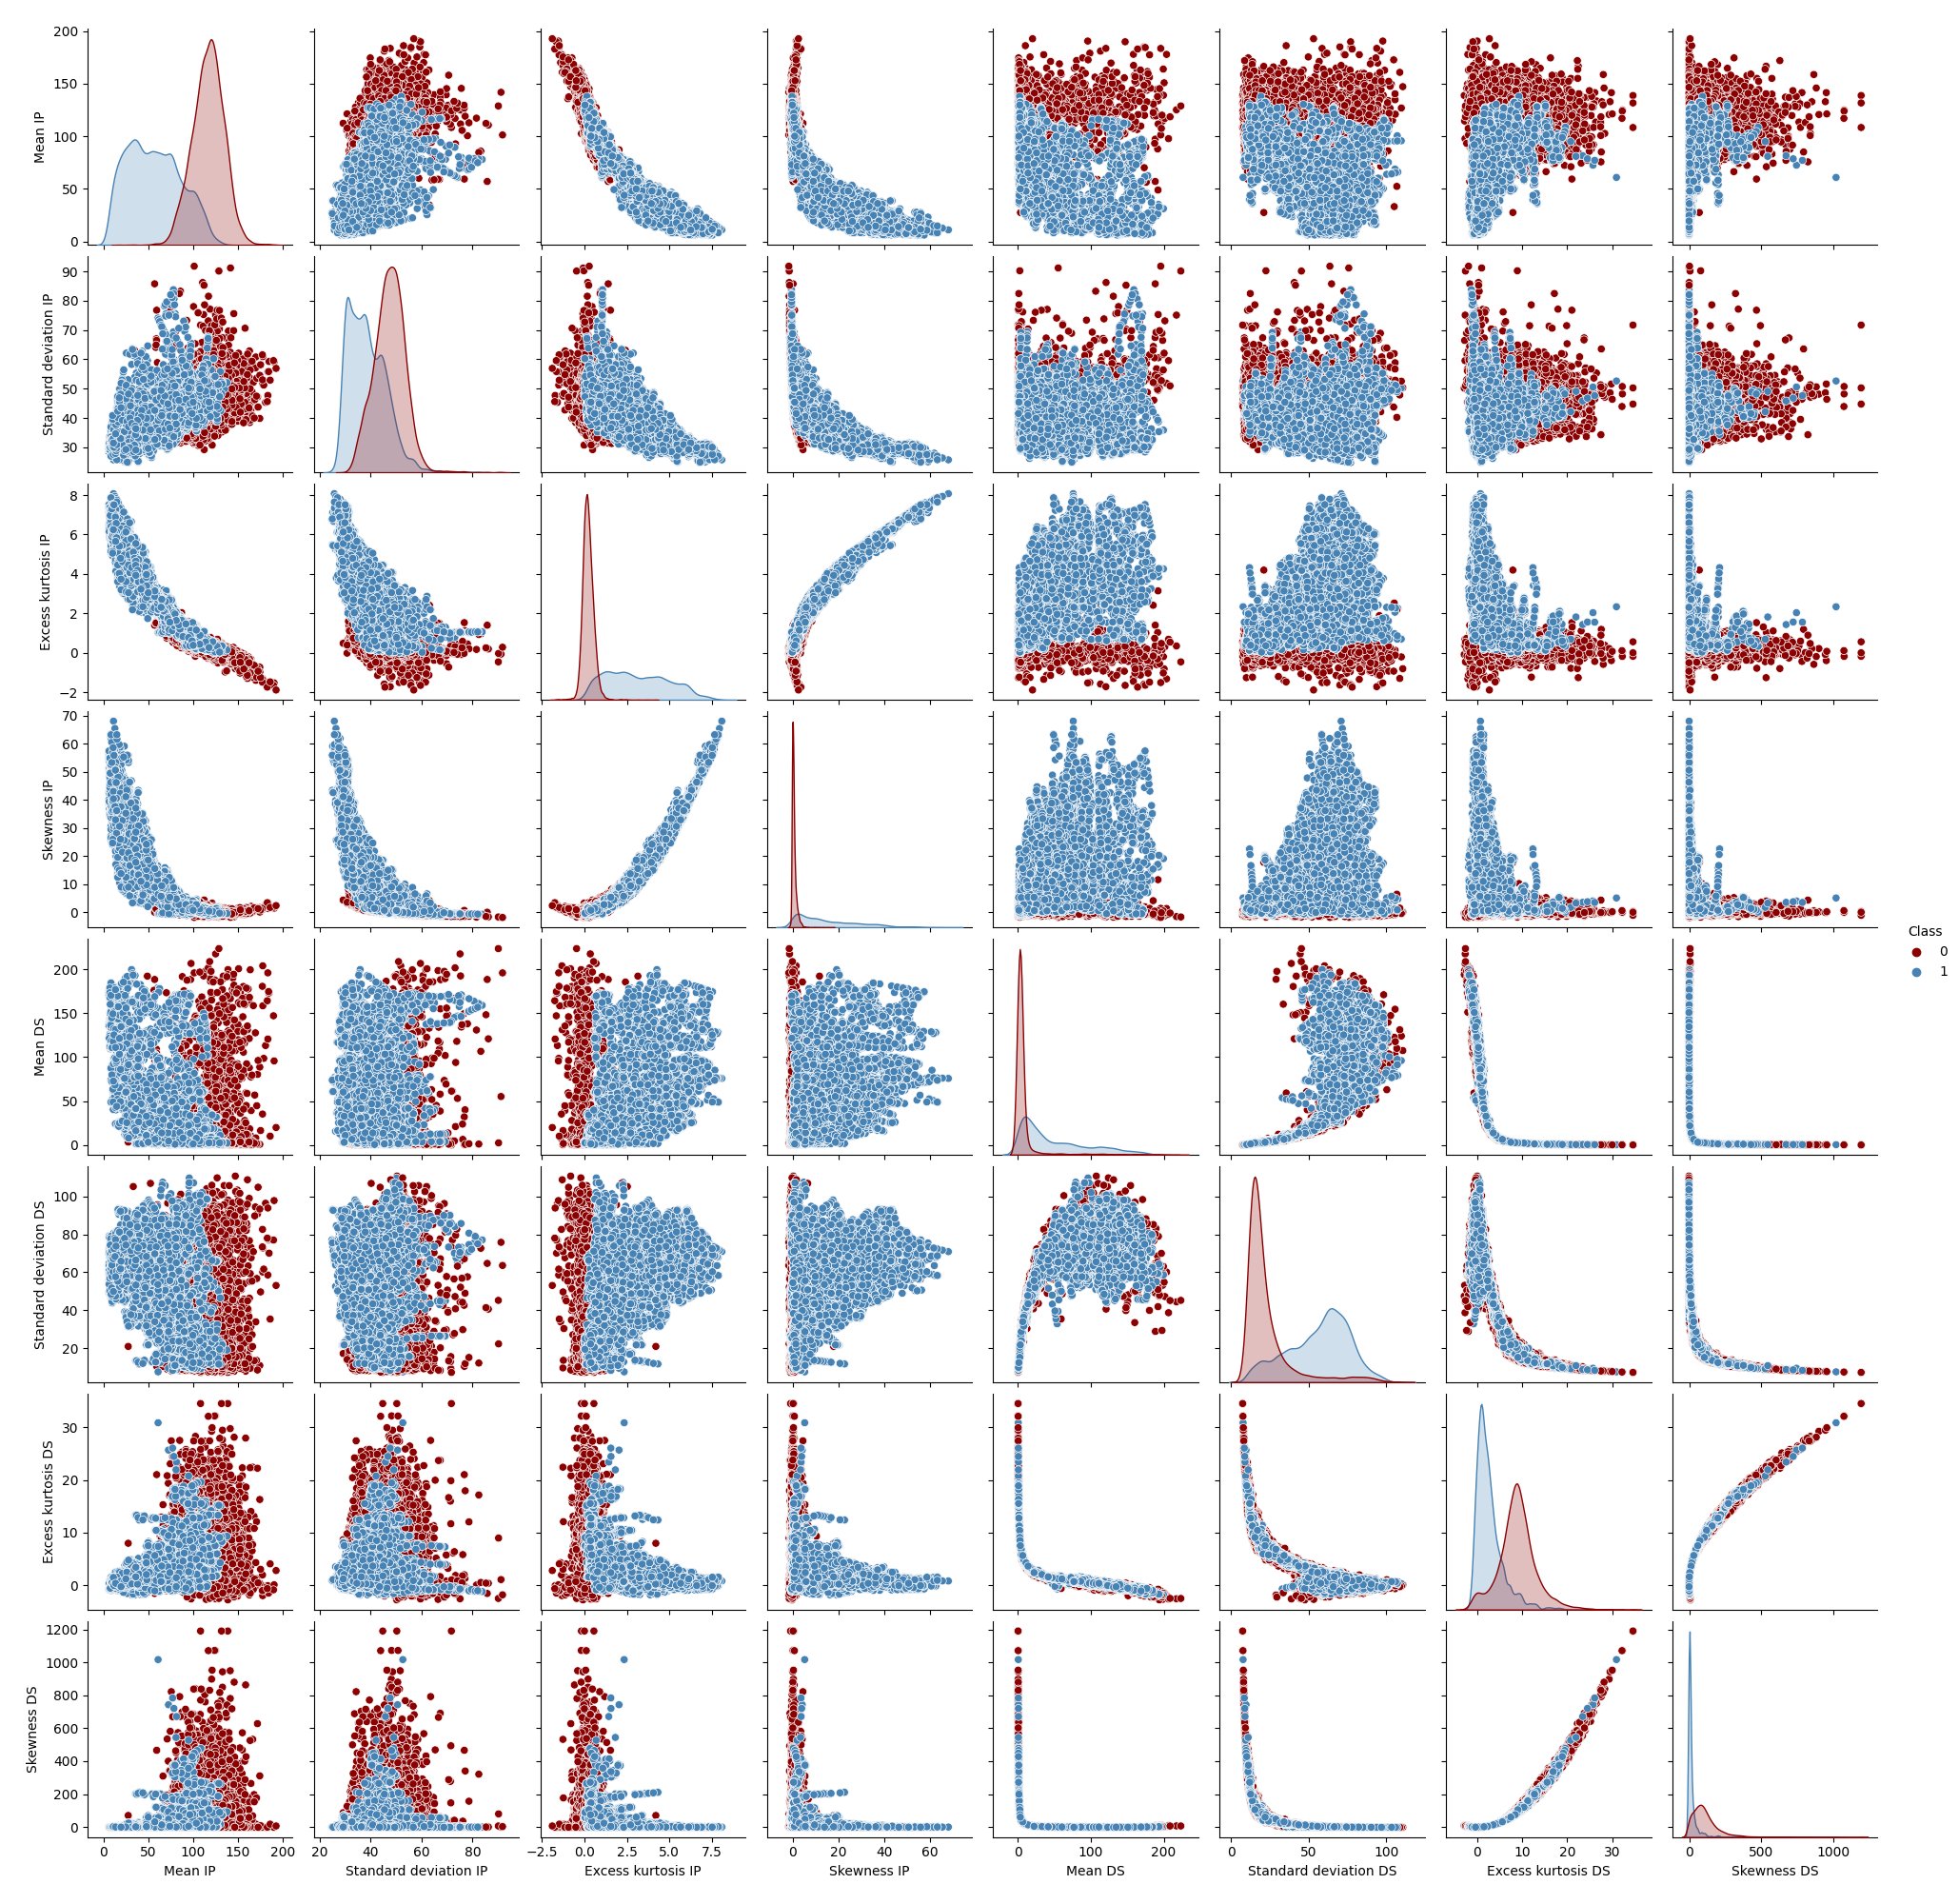

In [50]:
sb.pairplot(datasmt, hue = 'Class', palette = ['DarkRed', 'SteelBlue'])
# treba izbaciti autlajere pre smotea najverovatnije ali dobro to mogu i docnije

In [51]:
# u sustini od pretprocesiranja nije bilo potrebno nista specijalno uraditi, mozemo preci na modele
# greska, voleo bih jos da prikazem podatke koristeci PCA i pre svega vrv jedan SMOTE da balansiramo B)


In [52]:
datasmt
datasmt_test = pd.DataFrame.copy(x_test)
datasmt_test['Class'] = y_test
datasmt_test
datasmt.to_csv('dataSMOTE.csv')
datasmt_test.to_csv('dataSMOTE_test.csv')

In [53]:
# pakao, sad moram da normalizujem i standardizujem sve ovo da bi pca prosao, a verujem da bi mi i stablo odlucivanja bilo znatno bolje da to uradim
sc = StandardScaler()
xsmtSS = sc.fit_transform(xsmt)
x_testSS = sc.transform(x_test)


In [54]:
pca = PCA()
xsmtSSpca = pca.fit_transform(xsmtSS)

In [55]:
pd.DataFrame(xsmtSSpca).describe()

0             1             2             3             4  \
count  22760.000000  2.276000e+04  22760.000000  2.276000e+04  2.276000e+04   
mean       0.000000 -1.248757e-17      0.000000  1.186319e-17  9.990056e-18   
std        2.316040  1.194270e+00      0.806542  4.980791e-01  3.954697e-01   
min       -6.156202 -5.869533e+00     -1.327783 -2.506504e+00 -2.506817e+00   
25%       -1.809577 -6.428617e-01     -0.570095 -3.107297e-01 -2.307437e-01   
50%        0.706587  4.018736e-02     -0.199161  8.655245e-03  3.601755e-03   
75%        1.865529  7.532311e-01      0.376438  3.177951e-01  2.459166e-01   
max        8.207693  7.160880e+00      8.738230  3.671340e+00  2.611828e+00   

                  5             6             7  
count  2.276000e+04  2.276000e+04  2.276000e+04  
mean   2.497514e-17  4.058460e-17  6.431099e-17  
std    3.687244e-01  1.088090e-01  8.509382e-02  
min   -1.785587e+00 -4.009188e-01 -2.932561e-01  
25%   -2.210673e-01 -6.264023e-02 -5.882930e-02  
50%   -2.865935e-03  8.535586e-03 -2.647918e-03  
75%    2.105264e-01  6.338442e-02  5.344941e-02  
max    2.248039e+00  1.579833e+00  4.214213e-01

In [56]:
pd.DataFrame(xsmtSS)

0         1         2         3         4         5         6  \
0      0.686241  1.164441 -0.776977 -0.668136 -0.678361 -1.173049  2.345056   
1      0.997599  0.954963 -0.732383 -0.664013 -0.629686 -0.977962  0.543032   
2     -0.966726 -1.427337  0.937473  0.916258 -0.522897 -0.359309 -0.171504   
3     -1.132811 -0.951484  1.194949  0.926826 -0.242298  0.425844 -0.599091   
4      1.014571  0.805413 -0.746847 -0.656050 -0.433143  0.033032 -0.428195   
...         ...       ...       ...       ...       ...       ...       ...   
22755 -0.752264 -1.282998  0.753234  0.642855 -0.544726 -0.232633 -0.038827   
22756 -1.727870  0.067451  1.060875  0.495080  2.454962  1.061300 -1.272661   
22757 -0.941883 -1.659732  0.706445  0.893565 -0.620943 -0.729037  0.350641   
22758 -0.319153 -0.799338 -0.056276 -0.200833 -0.179276  0.646276 -0.717177   
22759 -1.300987 -0.822775  1.158446  0.826862  0.275760  1.087015 -0.882329   

              7  
0      2.782719  
1      0.267153  
2     -0.409388  
3     -0.606794  
4     -0.550346  
...         ...  
22755 -0.362156  
22756 -0.698301  
22757 -0.063792  
22758 -0.648732  
22759 -0.677432  

[22760 rows x 8 columns]

In [57]:
sb.heatmap(pd.DataFrame(xsmtSS).corr())

<Axes: >

In [58]:
sb.heatmap(pd.DataFrame(xsmtSSpca).corr())

<Axes: >

In [59]:
plot3PCA_plus_klasa = pd.DataFrame(np.copy(xsmtSSpca))


plot3PCA_plus_klasa.drop(labels = [3, 4, 5, 6, 7], axis = 'columns', inplace = True)
plot3PCA_plus_klasa['Class'] = ysmt

plot3PCA_plus_klasa

0         1         2  Class
0      3.515256  1.490815  1.766371      0
1      2.046217 -0.352961 -0.126303      0
2     -1.379607  1.508361 -1.013216      1
3     -2.013573  0.821275 -0.684690      1
4      0.970714 -1.391904 -0.562794      0
...         ...       ...       ...    ...
22755 -1.056155  1.279693 -0.942366      1
22756 -3.132091 -0.884344  1.374544      1
22757 -0.870200  2.042186 -0.938291      1
22758 -0.893258 -0.335914 -0.826591      1
22759 -2.529356  0.278456 -0.279733      1

[22760 rows x 4 columns]

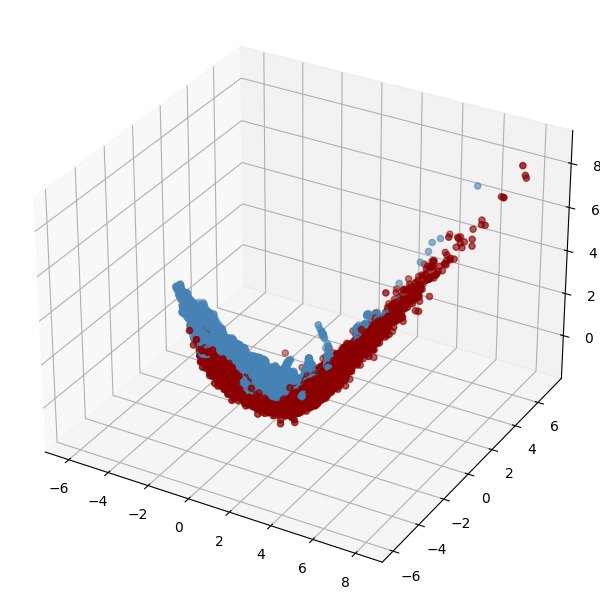

In [60]:
from mpl_toolkits.mplot3d import Axes3D
#import matplotlib.animation as anim

fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig, auto_add_to_figure = False)
fig.add_axes(ax)

#ax.view_init(120,120)

def boja(xs):
    ret = []
    for x in xs:
        if x == 1:
            ret.append('SteelBlue')
        else:
            ret.append('DarkRed')
    return ret
sc = ax.scatter(plot3PCA_plus_klasa[0], plot3PCA_plus_klasa[1], plot3PCA_plus_klasa[2], c = boja(plot3PCA_plus_klasa['Class']))

